## Проект: вариант 2
### Задание 1. A/B–тестирование
1.1 Условие

Одной из основных задач аналитика в нашей команде является корректное проведение экспериментов. Для этого мы применяем метод A/B–тестирования. В ходе тестирования одной гипотезы целевой группе была предложена новая механика оплаты услуг на сайте, у контрольной группы оставалась базовая механика. В качестве задания Вам необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователей.

1.2 Входные данные

В качестве входных данных Вы имеете 4 csv-файла:

    groups.csv - файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе (А – контроль, B – целевая группа) 
    groups_add.csv - дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных
    active_studs.csv - файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента. 
    checks.csv - файл с информацией об оплатах пользователей в дни проведения эксперимента. 
1.3 Вопросы

Предлагаем Вам ответить на следующие вопросы:

    На какие метрики Вы смотрите в ходе анализа и почему?
    Имеются ли различия в показателях и с чем они могут быть связаны?
    Являются ли эти различия статистически значимыми?
    Стоит ли запускать новую механику на всех пользователей?
Данный список вопросов не является обязательным, и Вы можете при своём ответе опираться на собственный план.

1.4 Требования к ответу

    При выполнении тестового задания необходимо использовать язык программирования Python. 
    В файле обязательно должны быть комментарии к тем действиям, которые Вы выполняете с данными. 
    Файл должен представлять собой законченный отчёт с выводами, сделанными в ходе исследования.

In [1]:
# импорт библиотек
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import requests  # для api
from urllib.parse import urlencode 

from scipy.stats import norm, chi2_contingency, ttest_ind, levene, bootstrap

pd.options.mode.chained_assignment = None # предупреждения

In [5]:
# API
def read_ya_disk(public_key,sep):

    # используем api 
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 

    # получаем url 
    final_url = base_url + urlencode(dict(public_key=public_key)) 
    response = requests.get(final_url) 
    download_url = response.json()['href'] 

    # загружаем файл в df 
    download_response = requests.get(download_url) 
    df = pd.read_csv(download_url,sep=sep) 
    return df



In [3]:
# чтение данных
active_studs_key = 'https://disk.yandex.ru/d/Tbs44Bm6H_FwFQ' 
active_studs = read_ya_disk(active_studs_key,sep=",")

checks_key = 'https://disk.yandex.ru/d/pH1q-VqcxXjsVA' 
checks = read_ya_disk(checks_key, sep=";")

groups_key = 'https://disk.yandex.ru/d/UhyYx41rTt3clQ'
groups = read_ya_disk(groups_key, sep=";").rename(columns={'id':'student_id'})

group_add_key = 'https://disk.yandex.ru/d/5Kxrz02m3IBUwQ'
group_add = read_ya_disk(group_add_key, sep=",").rename(columns={'id':'student_id'})

# локально
# active_studs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-bystrov/final project/Проект_2_active_studs.csv')
# checks = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-bystrov/final project/Проект_2_checks.csv', sep=";")
# groups = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-bystrov/final project/Проект_2_groups.csv', sep=";").rename(columns={'id':'student_id'})
# group_add = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-bystrov/final project/Проект_2_group_add.csv').rename(columns={'id':'student_id'})

#### Исследовние данных

_active_studs_

In [6]:
active_studs.head()

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369


In [7]:
active_studs.shape

(8341, 1)

In [8]:
active_studs.nunique()

student_id    8341
dtype: int64

In [9]:
active_studs.isna().sum()

student_id    0
dtype: int64

----

_checks_

In [10]:
checks.head()

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0


In [11]:
checks.shape

(541, 2)

In [12]:
checks.nunique()

student_id    541
rev            39
dtype: int64

In [13]:
checks.isna().sum()

student_id    0
rev           0
dtype: int64

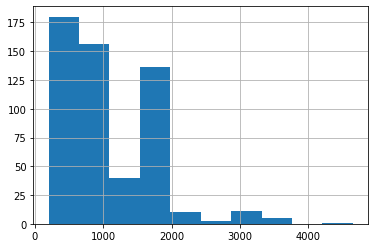

In [14]:
checks.rev.hist()

----

_groups_

In [15]:
groups.head()

,student_id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [16]:
groups.shape

(74484, 2)

In [17]:
groups.nunique()

student_id    74484
grp               2
dtype: int64

In [18]:
groups.isna().sum()

student_id    0
grp           0
dtype: int64

In [19]:
groups.grp.value_counts()

B    59813
A    14671
Name: grp, dtype: int64

----

In [20]:
group_add.head()

,student_id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B


In [21]:
group_add.shape

(92, 2)

In [22]:
group_add.nunique()

student_id    92
grp            2
dtype: int64

In [23]:
group_add.isna().sum()

student_id    0
grp           0
dtype: int64

In [24]:
group_add.grp.value_counts()

B    70
A    22
Name: grp, dtype: int64

----

Обединим данные в один датафрейм

In [25]:
# сначала соберем все данные по группам
groups_updated = groups.append(group_add)
groups_updated.head()

,student_id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [26]:
# проверяем размерность
groups_updated.shape

(74576, 2)

In [27]:
# не появилось ли дубли по id
groups_updated.student_id.value_counts().sort_values(ascending=False).head()

2897415    1
1134826    1
4250807    1
327712     1
1973006    1
Name: student_id, dtype: int64

In [28]:
# добавляем  колонку по статусу юзера активен/не активен
full_data = groups_updated.copy()
full_data['is_active'] = full_data['student_id'].apply(lambda x: 1 if x in active_studs['student_id'].values else 0)
full_data.head()

,student_id,grp,is_active
0,1489,B,0
1,1627,A,1
2,1768,B,0
3,1783,B,0
4,1794,A,0


In [29]:
# подтягиваем оплату
full_data = full_data.merge(checks,how='outer',on='student_id')
full_data.head()

,student_id,grp,is_active,rev
0,1489,B,0,NaN
1,1627,A,1,990.0
2,1768,B,0,NaN
3,1783,B,0,NaN
4,1794,A,0,NaN


проверим данные вкупе

In [30]:
full_data.nunique(dropna=False)

student_id    74576
grp               2
is_active         2
rev              40
dtype: int64

In [31]:
full_data.groupby('grp').nunique(dropna=False)

,student_id,is_active,rev
grp,,,
A,14693,2,24
B,59883,2,36


In [32]:
full_data.groupby('is_active').nunique(dropna=False)

,student_id,grp,rev
is_active,,,
0,66235,2,14
1,8341,2,39


Для неактивных пользователей имеются не только пустые значения, посмотрим на них детальнее

In [33]:
full_data.query("is_active == 0").rev.value_counts(dropna=False)

NaN          66086
690.0000        61
290.0000        24
990.0000        19
1140.0000       14
199.0000        14
580.0000         4
1900.0000        4
840.0000         3
398.0000         2
630.0000         1
1980.0000        1
1900.0001        1
1180.0000        1
Name: rev, dtype: int64

In [34]:
full_data.query("is_active == 0").rev.count()

149

In [35]:
full_data.query("is_active == 0").groupby('grp').rev.count()

grp
A     29
B    120
Name: rev, dtype: int64

149 пользователей имеют факт оплаты без активности в дни эксперимента.Такие пользователи есть в обоих группах, т.е. это не новая фича нашей механики оплаты. Как работает система, исходя из условий мы не знаем, возможно, была задержка оплаты, или есть возможность подписки на какие-либо услуги и оплачивать их автоматически без активности пользователя... можно только предполагать, но этот факт учтем.

### Проверка гипотез

#### Метрики
Из бизнес метрик  рационально было бы проверить следующие:
 - CR - конверсия в покупку, которая покажет, изменился ли процент пользователей, которые пользуются платными услугами.
   Т.к. сама по себе механика оплаты затрагивает только активных бользователей, и о каких-либо маркетинговых экспериментах, которые бы могли привлечь пользователей новой механикой речи не идет, рассматривать будем только их. 


 - ARPPU -  которая покажет, как изменилась средняя прибыль от одного платящего пользователя.

Пользователи с фактом оплаты, но без активности в расчетах метрик участвовать не будут т.к. природа данных событий не известна. 


In [36]:
# отбираем только активных пользователей, для наших метрик
active_data = full_data.query("is_active == 1")
active_data.head()

,student_id,grp,is_active,rev
1,1627,A,1,990.0
10,2085,B,1,NaN
12,2215,B,1,NaN
43,3391,A,1,NaN
45,3401,B,1,NaN


#### CR - конверсия активного пользователя в покупку. В данном случае мы имеем 2 категориальных переменных - группа пользователя и отсутствие/наличие факта оплаты пользователем, поэтому будем использовать критерий хи-квадрат.

    Гипотеза:
    H0: Разницы между конверсией в группе A и B нет.
    H1: Разница между конверсией в группе A и B есть.

In [99]:
#  + колонка категории отсутствие/наличие факта оплаты
active_data['payed'] = (active_data.rev > 0).astype(str)
active_data

,student_id,grp,is_active,rev,payed
1,1627,A,1,990.0,True
10,2085,B,1,0.0,False
12,2215,B,1,0.0,False
43,3391,A,1,0.0,False
45,3401,B,1,0.0,False
...,...,...,...,...,...
74543,5760471,B,1,0.0,False
74545,5777081,B,1,0.0,False
74558,5870856,A,1,0.0,False
74561,5945085,B,1,0.0,False


In [73]:
active_data_s = active_data.query("payed =='True'")

In [75]:
active_data_s = active_data_s.append(active_data.query("payed =='False'").sample(n=392))

In [76]:
active_data_s

,student_id,grp,is_active,rev,payed
1,1627,A,1,990.0000,True
220,100300,B,1,990.0000,True
320,108270,B,1,290.0000,True
3779,264473,B,1,1900.0001,True
4187,274352,B,1,690.0000,True
...,...,...,...,...,...
34210,1527518,B,1,0.0000,False
33850,1515293,B,1,0.0000,False
31931,1438512,B,1,0.0000,False
71989,5226909,B,1,0.0000,False


In [106]:
# выведем значения cr для групп
cr = (active_data.query("payed == 'True'").groupby('grp').student_id.count() /
               active_data.groupby('grp').student_id.count() * 100).round(2)
cr

grp
A    5.07
B    4.62
Name: student_id, dtype: float64

In [103]:
payed_students

payed
True    392
Name: student_id, dtype: int64

In [83]:
# Таблица сопряжённости
crosstab_table = pd.crosstab(active_data.grp, active_data.payed)
crosstab_table

payed,False,True
grp,,
A,1460,78
B,6489,314


In [85]:
# Таблица сопряжённости
crosstab_table = pd.crosstab(active_data_s.grp, active_data_s.payed)
crosstab_table

payed,False,True
grp,,
A,64,78
B,328,314


In [87]:
# выведем значения cr для групп
cr = (crosstab_table['True']/crosstab_table['False']*100).round(2)
cr

grp
A    121.88
B     95.73
dtype: float64

В тестовой группе CR  ниже

In [88]:
# Хи-тест
c, p, dof, expected = chi2_contingency(crosstab_table)
print('Результат хи-теста: \n', 'chi_value:', c, '  df:', dof,'  p-value:', p)

Результат хи-теста: 
 chi_value: 1.4533807204598306   df: 1   p-value: 0.22798626107012804


 _P-value приблизительно равен 0.49 => мы не можем отклонить нулевую гипотезу. Cтатистически значимых различий CR между группами не выявлено._

#### ARPPU - средняя прибыль от одного платящего пользователя.

In [41]:
# отбор платящих 
payed_data = active_data.query("payed == 'True'")
payed_data

,student_id,grp,is_active,rev,payed
1,1627,A,1,990.0000,True
220,100300,B,1,990.0000,True
320,108270,B,1,290.0000,True
3779,264473,B,1,1900.0001,True
4187,274352,B,1,690.0000,True
...,...,...,...,...,...
74365,5645737,B,1,1900.0000,True
74381,5651566,B,1,1900.0000,True
74402,5662322,B,1,1900.0000,True
74452,5681918,B,1,1900.0000,True


Посчитаем значния ARPPU для групп:

In [42]:
ARPPU = (payed_data.groupby('grp').rev.sum()/payed_data.groupby('grp').student_id.count()).round(2)
ARPPU

grp
A     933.59
B    1257.88
dtype: float64

В тестовой группе показатель ARPPU выше

Исследуем распределения для выбора метода анализа:

In [43]:
# размер групп
payed_data.groupby('grp').student_id.nunique()

grp
A     78
B    314
Name: student_id, dtype: int64

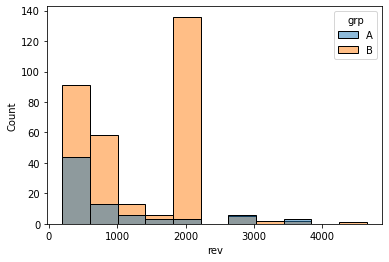

In [44]:
# распределение сумм в разрезе групп
sns.histplot(payed_data, x='rev', hue='grp')

Как мы видим, что распределения явно не нормальные, и в группе В есть всплеска в значениях около 2000,  посмотрим на значения детальнее:

In [45]:
B_pay = payed_data.query("grp == 'B'").rev.value_counts().sort_index()
B_pay

199.0000     27
290.0000     45
398.0000      6
489.0000      1
580.0000      5
590.0000      6
597.0000      1
690.0000     13
796.0000      1
840.0000     21
870.0000      5
880.0000      1
990.0000     17
1050.0000     1
1140.0000     9
1160.0000     1
1339.0000     1
1388.0000     1
1530.0000     5
1729.0000     1
1900.0000    93
1900.0001    35
1968.0000     1
1980.0000     2
2099.0000     3
2190.0000     1
2220.0000     1
2890.0000     3
2910.0000     2
3040.0000     1
3260.0000     1
3660.0000     2
4650.0000     1
Name: rev, dtype: int64

Всплеск произошел непосредственно на значении 1900, при этом также стоит отметить, что имеется не округленное значение 1900.0001. Взглянем как пересекаются суммы между группами. 

In [46]:
A_pay = payed_data.query("grp == 'A'").rev.value_counts().sort_index()
pay_sum = A_pay.reset_index().merge(B_pay.reset_index(),how='outer',on='index').sort_values(by='index')
pay_sum

,index,rev_x,rev_y
0,199.0000,5.0,27.0
1,290.0000,25.0,45.0
2,398.0000,1.0,6.0
3,489.0000,2.0,1.0
4,580.0000,6.0,5.0
5,590.0000,5.0,6.0
23,597.0000,NaN,1.0
6,690.0000,4.0,13.0
24,796.0000,NaN,1.0
7,840.0000,3.0,21.0


Можно заметить, что группе А оплата в размере 1900 не встречается, хотя в группе B более 120 случаев,когда с остальными суммами, это единичные случаи. Вероятно, всплеск обусловлен новыми условиями в рамках тестируемой мехники, которые привлекают пользователей.

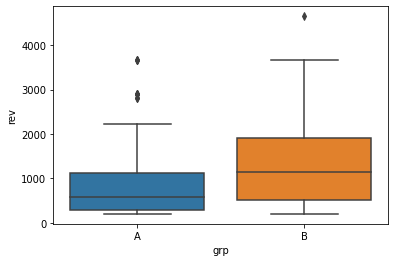

In [47]:
# боксплот в разрезе групп
sns.boxplot(data=payed_data, y='rev',x='grp')

Наши распределения не нормальные, но группы достаточно большие по размеру, можно было бы рассмотреть Т критерий Стьюдента или Уэлча в зависимости от гомогенности дисперсий, однако есть выбросы. Посмотрим, насколько их много:

In [48]:
# Функция подчета % выбросов
def outliers(df, data_column):
    Q1 = df[data_column].quantile(0.25)
    Q3 = df[data_column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_count = df[data_column][(df[data_column] < lower_bound) | (df[data_column] > upper_bound)].count()
    outliers_percent = (outliers_count / df[data_column].count() * 100).round(2)
    
    return outliers_count, outliers_percent


In [49]:
outliers(payed_data.query("grp == 'A'"), 'rev')


(9, 11.54)

In [50]:
outliers(payed_data.query("grp == 'B'"), 'rev')

(1, 0.32)

В группе А достаточно большой процент выбросов, более 11%, поэтому Т критерий  нам не подоходит, критерий Манн-Уитни не подходит для сравнения средних, будем использовать бутстрэп.

    Гипотеза:
    H0: Разницы между ARPPU в группе A и B нет.
    H1: Разница между ARPPU в группе A и B есть.

In [51]:
#  Выдает 95% интервал для разницы средних между группами
def bootstrap_diff(data_control, data_exp):
    mean_diff = []

    for i in range(10000):
        sample_data_control = data_control.sample(frac=1, replace=True)
        sample_mean_control = sample_data_control.mean()

        sample_data_exp = data_exp.sample(frac=1, replace=True)
        sample_mean_exp = sample_data_exp.mean()

        sample_mean_diff = sample_mean_control - sample_mean_exp
        mean_diff.append(sample_mean_diff)
        
    Q1 = pd.Series(mean_diff).quantile(0.025)
    Q3 = pd.Series(mean_diff).quantile(0.975) 
        
    return Q1, Q3


In [52]:
bootstrap_diff(payed_data.query("grp == 'A'").rev, payed_data.query("grp == 'B'").rev)

(-537.1696365588764, -90.70878980177227)

_В 95% доверительный интервал разницы средних 0 не попадает => мы можем отклонить нулевую гипотезу о том, что стат. значимых различий в ARPPU между группами нет._

#### Выводы
 В ходе эксперимента проведен A/Б тест 2х метрик, получены следующие результаты:
 - CR. Имеется незначительное снижение метрики в тестовой группе, стат.значимых различий не вывлено.

 - ARPPU. Выявлено стат. значимый рост данной метрики.
 
Т.к. результаты/ тестов показали что новая механика положительно влияет на ARPPU, стоит выкатывать механику для всех
 

### Задание 2. SQL


#### 2.1 Очень усердные ученики.

 *2.1.1 Условие*

Образовательные курсы состоят из различных уроков, каждый из которых состоит из нескольких маленьких заданий. Каждое такое маленькое задание называется "горошиной".

Назовём очень усердным учеником того пользователя, который хотя бы раз за текущий месяц правильно решил 20 горошин.

 *2.1.2 Задача*

Дана таблица default.peas:

    Название атрибута	Тип атрибута	Смысловое значение
    
    st_id    			int 			ID ученика
    timest   			timestamp   	Время решения карточки
    correct  			bool			Правильно ли решена горошина?
    subject  			text			Дисциплина, в которой находится горошина


Необходимо написать оптимальный запрос, который даст информацию о количестве очень усердных студентов.NB! Под усердным студентом мы понимаем студента, который правильно решил 20 задач за текущий месяц.

#### *2.1.3 Решение*

In [61]:
import pandahouse as ph

In [62]:
my_connection = {'host': 'https://clickhouse.lab.karpov.courses',
                      'database':'default',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [63]:
q = '''
    WITH A AS (
        SELECT 
            st_id,
            SUM(correct) as correct_sum   
        FROM 
            {db}.peas   
        WHERE toStartOfMonth(timest) = toStartOfMonth((SELECT MAX(timest) FROM peas)) 
        GROUP BY st_id     
        HAVING correct_sum >=20  
        )
    SELECT 
        COUNT(DISTINCT st_id)
    FROM A
        '''


query_1 = ph.read_clickhouse(query=q, connection=my_connection)
query_1

,uniqExact(st_id)
0,136



#### 2.2 Оптимизация воронки

 *2.2.1 Условие*

Образовательная платформа предлагает пройти студентам курсы по модели trial: студент может решить бесплатно лишь 30 горошин в день. Для неограниченного количества заданий в определенной дисциплине студенту необходимо приобрести полный доступ. Команда провела эксперимент, где был протестирован новый экран оплаты.

 *2.2.2 Задача*

Даны таблицы: 

- default.peas :

      Название атрибута	Тип атрибута	Смысловое значение

        st_id    			int 			ID ученика
        timest   			timestamp   	Время решения карточки
        correct  			bool			Правильно ли решена горошина?
        subject  			text			Дисциплина, в которой находится горошина

- default.studs:
      
        Название атрибута	Тип атрибута	Смысловое значение
        
        st_id    			int 			ID ученика
        test_grp 			text			Метка ученика в данном эксперименте
    
- и default.final_project_check:

        Название атрибута	Тип атрибута	Смысловое значение
        
        st_id    			int 			ID ученика
        sale_time			timestamp   	Время покупки
        money    			int 			Цена, по которой приобрели данный курс
        subject  			text			

Необходимо в одном запросе выгрузить следующую информацию о группах пользователей:

    ARPU 
    ARPAU 
    CR в покупку 
    СR активного пользователя в покупку 
    CR пользователя из активности по математике (subject = ’math’) в покупку курса по математике
    ARPU считается относительно всех пользователей, попавших в группы.

Активным считается пользователь, за все время решивший больше 10 задач правильно в любых дисциплинах.

Активным по математике считается пользователь, за все время решивший 2 или больше задач правильно по математике.

In [64]:
q = '''
  SELECT
        test_grp,        
-- ARPU        
        SUM(money)/COUNT(DISTINCT studs.st_id) AS ARPU,
-- ARPAU        
        SUM(IF(correct_sum > 10, money, 0)) / COUNT(DISTINCT IF(correct_sum > 10, studs.st_id, NULL)) AS ARPAU,
-- CR Users        
        COUNT(DISTINCT IF(notEmpty(final_project_check.st_id), final_project_check.st_id, NULL)) \
      / COUNT(DISTINCT studs.st_id)*100 AS CR_U_2_purchase,
-- CR Active Users            
        COUNT(DISTINCT IF(notEmpty(final_project_check.st_id) and correct_sum > 10, final_project_check.st_id, NULL)) \
      / COUNT(DISTINCT IF(correct_sum > 10, studs.st_id, NULL))*100 AS CR_AU_2_purchase,
-- CR Active Math Users               
        COUNT(DISTINCT IF(subject='Math' and Math_sum >= 2, final_project_check.st_id, NULL)) \
      / COUNT(DISTINCT IF(Math_sum >= 2, studs.st_id, NULL))*100 AS CR_Math_AU_2_purchase     
        
    FROM 
        studs
    LEFT JOIN final_project_check on studs.st_id = final_project_check.st_id
    LEFT JOIN
             ( 
                SELECT 
                    st_id,
                    SUM(correct) as correct_sum,
                    SUM(IF(subject='Math', correct, 0)) as Math_sum
                FROM peas   
                GROUP BY st_id    
             ) AS P ON P.st_id = studs.st_id             
    GROUP BY test_grp
    '''

query_2 = ph.read_clickhouse(query=q, connection=my_connection)
query_2.round(2)

,test_grp,ARPU,ARPAU,CR_U_2_purchase,CR_AU_2_purchase,CR_Math_AU_2_purchase
0,control,4540.98,10393.70,4.92,11.02,6.12
1,pilot,11508.47,29739.58,10.85,26.04,9.52


### Задание 3. Python
#### 3.1 Задача

- Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.

In [6]:
def update_data(group_add_key, active_studs=pd.DataFrame(), checks=pd.DataFrame(), groups=pd.DataFrame(), reload=1):
    
    """
    Функция подгружает дополнительные данные для groups и подсчитывает метрики CR,ARPPU. Выводит в виде датафрейма.
    Возможна выгрузка всех данных напрямую из хранилища.
    Принимает: group_add_key(обяз.) - ссылка на дополнительные данные.
               active_studs, checks, groups(опц.) - если данные подгружаются к данным из ноутбука.
               reload(обяз.)  1 - если все данные необходимо выгрузить из хранилища(по умолч.), 0 - если используются данные из ноутбука.

    Возвращает: Инфо о количестве загруженных студентов, ошибках и датафрейм с метриками.
        
    """
# подфункция подгрузки файлов с яндекс диска   
    def read_ya_disk(public_key,sep):

        # используем api 
        base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 

        # получаем url 
        final_url = base_url + urlencode(dict(public_key=public_key)) 
        response = requests.get(final_url) 
        download_url = response.json()['href'] 

        # загружаем файл в df 
        download_response = requests.get(download_url) 
        df = pd.read_csv(download_url,sep=sep) 
        return df

# чтение данных
    group_add = read_ya_disk(group_add_key,sep=",").rename(columns={'id':'student_id'})

    if reload == 1:
        print('Чтение из хранилища')
        
        # active_studs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-bystrov/final project/Проект_2_active_studs.csv')
        active_studs_key = 'https://disk.yandex.ru/d/Tbs44Bm6H_FwFQ' 
        active_studs = read_ya_disk(active_studs_key,sep=",")
         
        # checks = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-bystrov/final project/Проект_2_checks.csv', sep=";")
        checks_key = 'https://disk.yandex.ru/d/pH1q-VqcxXjsVA' 
        checks = read_ya_disk(checks_key, sep=";")
    
        # groups = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-bystrov/final project/Проект_2_groups.csv', sep=";").rename(columns={'id':'student_id'})
        groups_key = 'https://disk.yandex.ru/d/UhyYx41rTt3clQ'
        groups = read_ya_disk(groups_key, sep=";").rename(columns={'id':'student_id'})

    elif (active_studs.empty or checks.empty or groups.empty):
        print('Недостаточно входных данных')
        return 
    
# проверка на дубли
    groups2 = groups        
    groups = groups.append(group_add)   
    dub = groups.student_id.duplicated().sum()
    
    if group_add.shape[0] == dub: # если все id уже есть
        groups = groups2 # откат
        print('Данный список студентов уже был загружен')
        
    elif dub > 0: # если некоторые id уже есть
        if dub == groups.duplicated().sum(): # строки полностью задублированны
            print('{} из {} студентов уже в списке, дубликаты удалены'.format(dub, group_add.shape[0]))
            groups.drop_duplicates(inplace=True)
        else: # дубли по id, но не по всей строке => id был отнесен к разным группам
            groups.drop_duplicates(inplace=True)
            dub_s = groups.student_id.duplicated().sum() # убрали полные дубли, должны остаться дубли по id с расхождениями
            print('{} студентов задублированны, {} имеют расхождения в данных. Откат загрузки'.format(dub, dub_s))
            print(groups[groups.student_id.duplicated()])
            groups = groups2 # откат
    else:
        print('Добавлено {} студентов'.format(group_add.student_id.nunique()))

    # сборка датафрейма
    f_data = groups.copy()
    f_data['is_active'] = f_data['student_id'].apply(lambda x: 1 if x in active_studs['student_id'].values else 0)
    f_data = f_data.merge(checks,how='outer',on='student_id').fillna(0)
    f_data['payed'] = (f_data.rev > 0).astype(str)    
    
    # подсчет метрик
    CR = (f_data.query("is_active == 1 & payed =='True'").groupby('grp').student_id.count() /
               f_data.query("is_active == 1").groupby('grp').student_id.count() * 100).round(2)

    ARPPU = (f_data.query("is_active == 1 & payed =='True'").groupby('grp').rev.sum()/
             f_data.query("is_active == 1 & payed =='True'").groupby('grp').student_id.count()).round(2) 
    
    
    metrics = pd.concat([CR, ARPPU], axis=1, keys=['CR', 'ARPPU'])
    return metrics

In [7]:
group_add_key = 'https://disk.yandex.ru/d/5Kxrz02m3IBUwQ'

metrics = update_data(group_add_key, reload=1)
# metrics = update_data(group_add_key,active_studs,checks,groups, reload=0)
metrics

Чтение из хранилища


C:\Users\Иван\AppData\Local\Temp\ipykernel_28036\1258127648.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = groups.append(group_add)


Добавлено 92 студентов


,CR,ARPPU
grp,,
A,5.07,933.59
B,4.62,1257.88


- Реализуйте функцию, которая будет строить графики по получаемым метрикам.

In [8]:

def plots(metrics):
    """
    Рисует barplot по метрикам  из датафрейма.
    Формат требуемого датафрейма: индекс - группа, колонки - метрики.

    """    
    
    # импорт библиотек на всякий
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # строим сетку для отображения в ряд
    fig, axes = plt.subplots(1, len(metrics.columns), figsize=(len(metrics.columns)*6, 6))
    
    # отрисовка графика по каждому столбцу
    for i, column in enumerate(metrics.columns):
        sns.barplot(x=metrics.index, y=metrics[column], ax=axes[i])
        axes[i].set_xlabel('Groups')
        axes[i].set_ylabel(column)
        axes[i].set_title(f'Barplot {column}')
    
    plt.show()

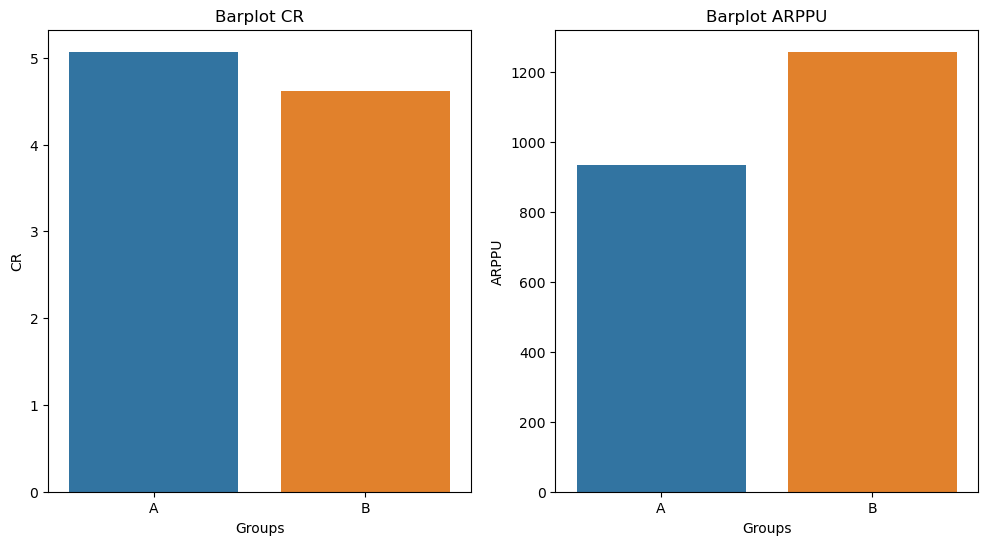

In [9]:
plots(metrics)